# Build Chatbots That Know Your Business (with MongoDB and Cohere)


 **What you will learn:**
 * How to empower leverage semantic search on customer or operational data in MongoDB Atlas.
 * Pass retrieved data to Cohere’s Command R+ generative model for retrieval-augmented generation (RAG).
 * Develop and deploy a RAG-optimized user interface for your app.
 * Create a conversation data store for your RAG chatbot using MongoDB

**Use Case**: Develop an advanced chatbot assistant that provides asset managers with information and actionable insights on technology company market reports.


## Introduction

- What is Cohere?
- What is MongoDB?
- How Cohere and MongoDB work together?

### What is Cohere?

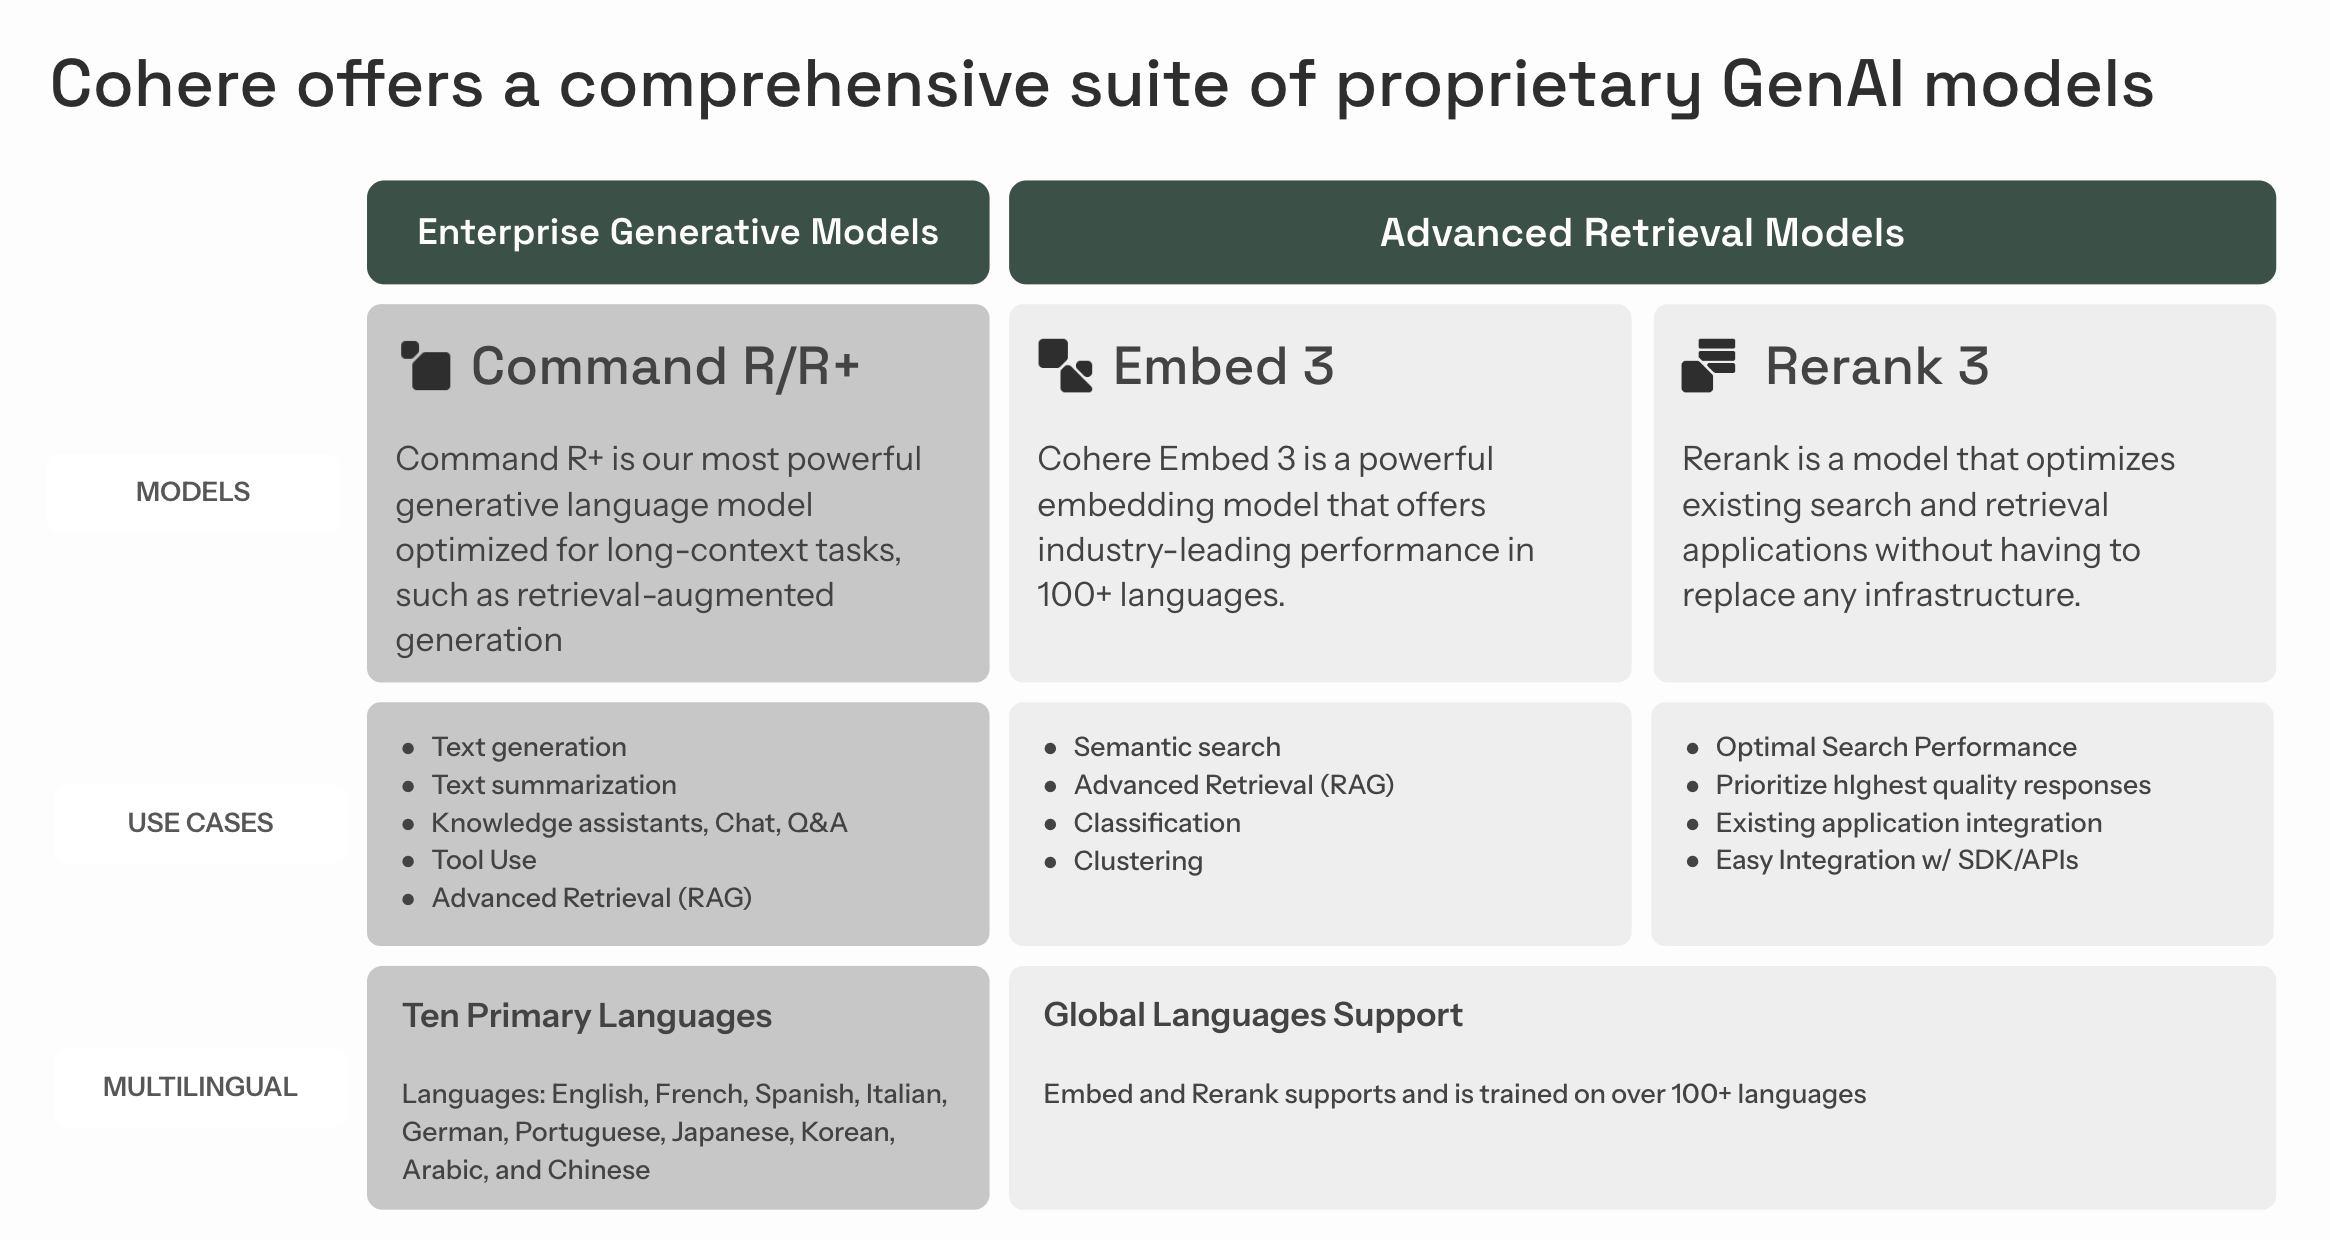

### What is MongoDB?

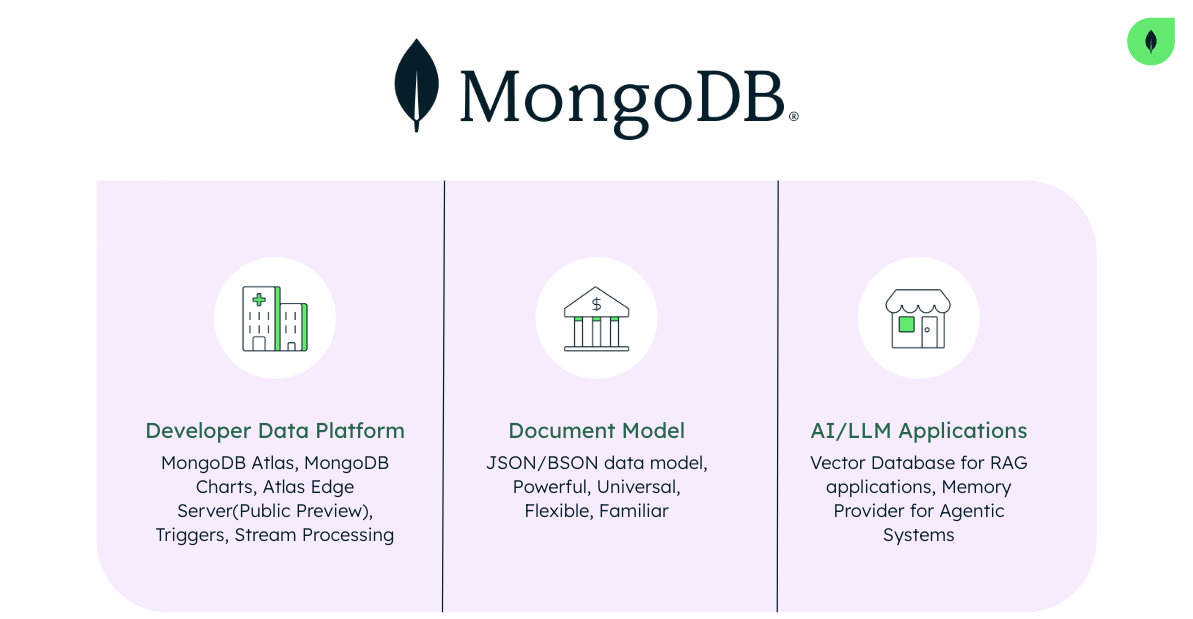

### What exactly are we showing today?


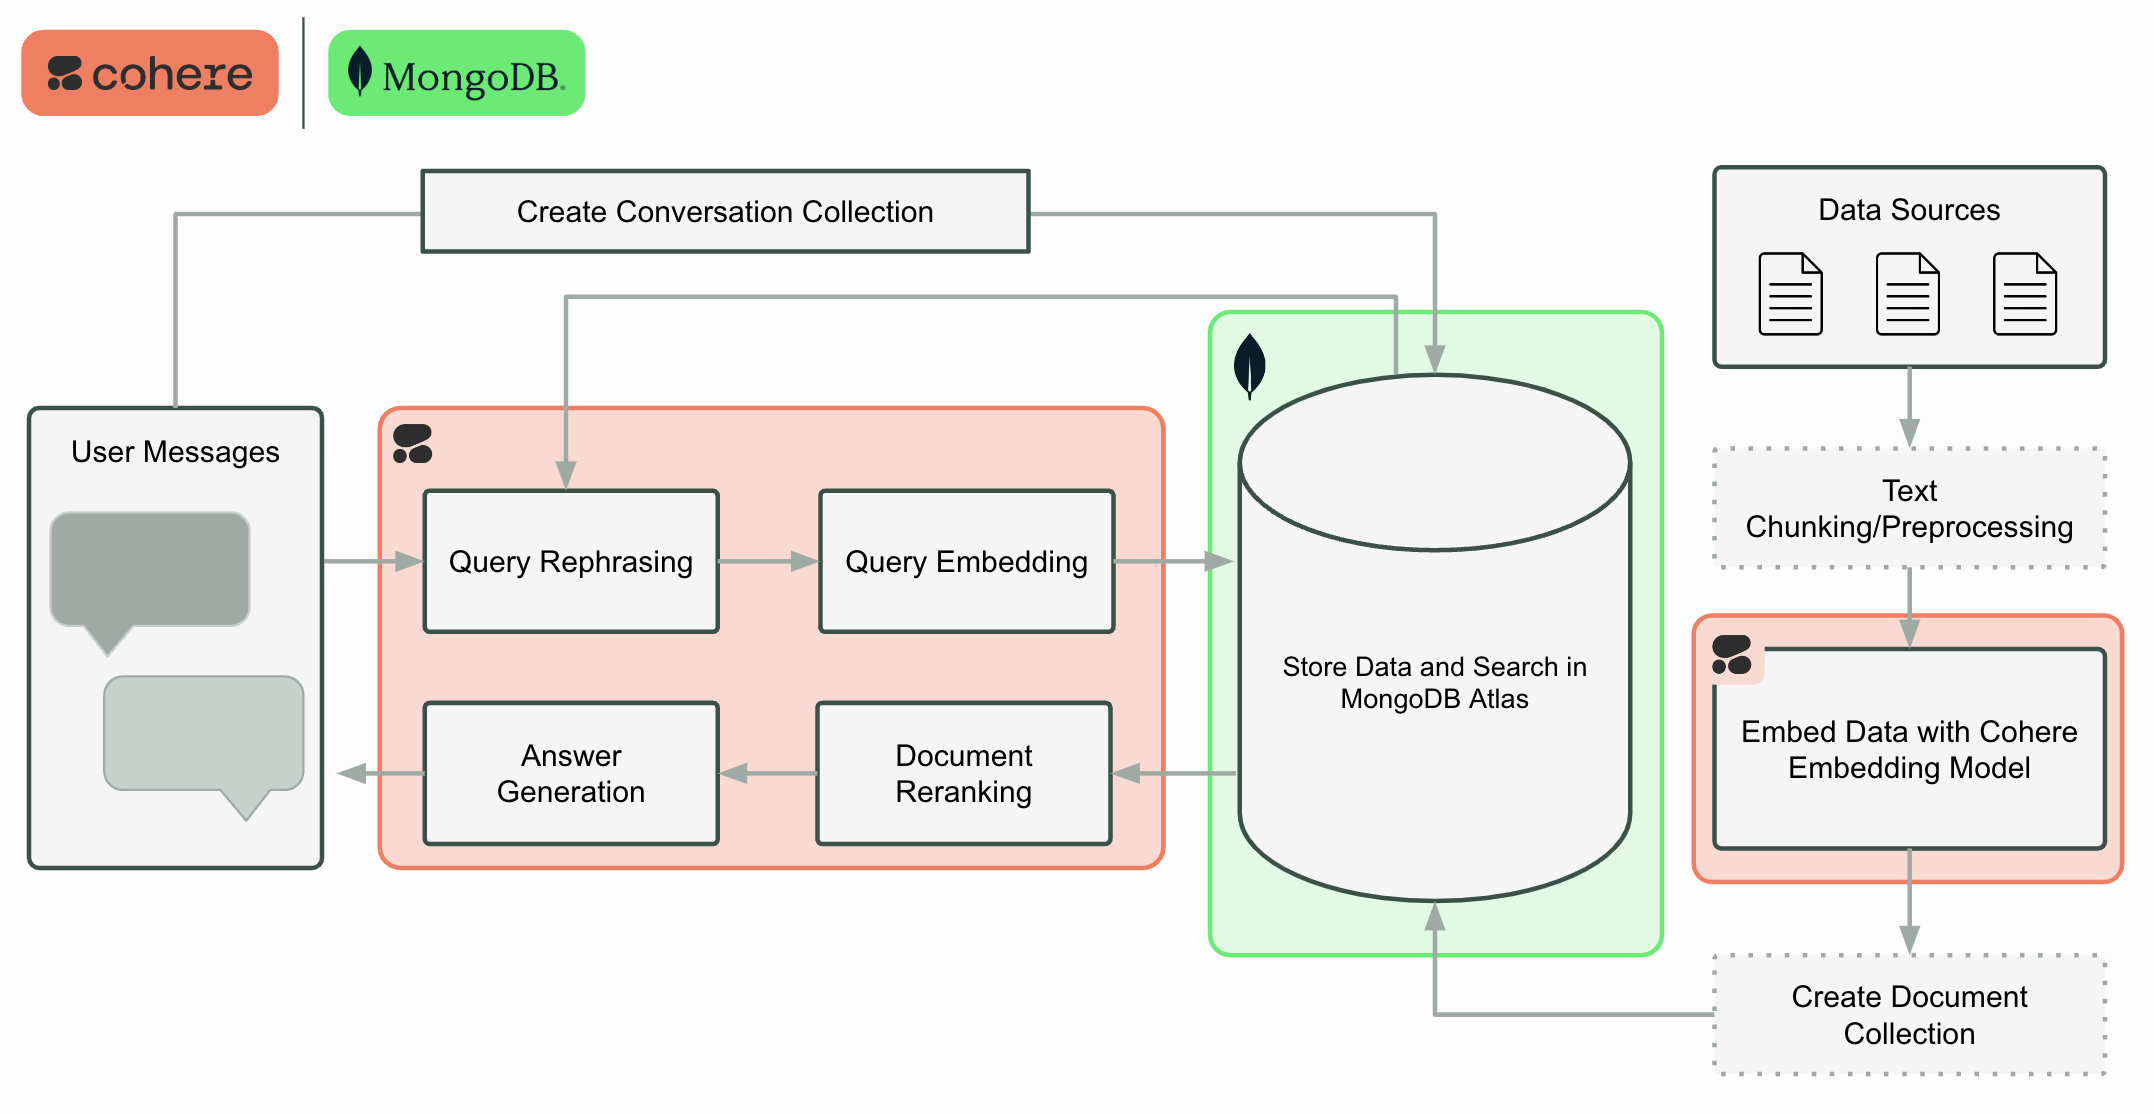

## Step 1: Install libaries and Set Environment Variables

🚨Critical Security Reminder: Safeguard your production environment by never committing sensitive information, such as environment variable values, to public repositories. This practice is essential for maintaining the security and integrity of your systems.

Libraries:
* `cohere`: A Python library for accessing Cohere's large language models, enabling natural language processing tasks like text generation, classification, and embedding.
* `pymongo`: The recommended Python driver for MongoDB, allowing Python applications to interact with MongoDB databases for data storage and retrieval.
* `datasets`: A library by Hugging Face that provides easy access to a wide range of datasets for machine learning and natural language processing tasks.
*`tqdm`: A fast, extensible progress bar library for Python, useful for displaying progress in long-running operations or loops.


In [ ]:
%pip install --quiet datasets tqdm cohere pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import cohere

os.environ["COHERE_API_KEY"] = ""
co = cohere.Client(os.environ.get("COHERE_API_KEY"))

## Step 2: Data Loading and Preparation
**Dataset Information**

This dataset contains detailed information about multiple technology companies in the Information Technology sector. For each company, the dataset includes:

1. Company name and stock ticker symbol
2. Market analysis reports for recent years (typically 2023 and 2024), which include:
  - Title and author of the report
  - Date of publication
  - Detailed content covering financial performance, product innovations, market position, challenges, and future outlook
  - Stock recommendations and price targets

3. Key financial metrics such as:
  - Current stock price
  - 52-week price range
  - Market capitalization
  - Price-to-earnings (P/E) ratio
  - Dividend yield


4. Recent news items, typically including:
  - Date of the news
  - Headline
  - Brief summary

The market analysis reports provide in-depth information about each company's performance, innovations, challenges, and future prospects. They offer insights into the companies' strategies, market positions, and potential for growth.

In [ ]:
# Load Dataset
import json
import pandas as pd
from datasets import load_dataset

json_filename = "all_market_reports.json"
dataset_df = pd.read_json(json_filename)

dataset_df.head(5)

,company,ticker,sector,reports,key_metrics,recent_news
0,TechInnovate,TCIV,Information Technology,"[{'year': 2023, 'title': 'TechInnovate (TCIV) ...","{'current_stock_price': 355.75, '52_week_range...","[{'date': '2024-07-22', 'headline': 'TechInnov..."
1,BioTech Innovations,BTCI,Information Technology,"[{'year': 2023, 'title': 'BioTech Innovations ...","{'current_stock_price': 273.71, '52_week_range...","[{'date': '2024-06-13', 'headline': 'BioTech I..."
2,AI Dynamics,AIDYN,Information Technology,"[{'year': 2023, 'title': 'AI Dynamics (AIDYN) ...","{'current_stock_price': 309.25, '52_week_range...","[{'date': '2024-05-29', 'headline': 'AI Dynami..."
3,CloudSecure Systems,CLSC,Information Technology,"[{'year': 2023, 'title': 'CloudSecure Systems ...","{'current_stock_price': 418.91, '52_week_range...","[{'date': '2024-07-15', 'headline': 'CloudSecu..."
4,QuantumSoft,QSFT,Information Technology,"[{'year': 2023, 'title': 'QuantumSoft (QSFT) -...","{'current_stock_price': 146.51, '52_week_range...","[{'date': '2024-05-30', 'headline': 'QuantumSo..."


In [ ]:
# Data Preparation
def combine_attributes(row):
  combined = f"{row['company']} {row['sector']} "

  # Add reports information
  for report in row['reports']:
    combined += f"{report['year']} {report['title']} {report['author']} {report['content']} "

  # Add recent news information
  for news in row['recent_news']:
    combined += f"{news['headline']} {news['summary']} "

  return combined.strip()

In [ ]:
# Add the new column 'combined_attributes'
dataset_df['combined_attributes'] = dataset_df.apply(combine_attributes, axis=1)

In [ ]:
# Display the first few rows of the updated dataframe
dataset_df[['company', 'ticker', 'combined_attributes']].head()

,company,ticker,combined_attributes
0,TechInnovate,TCIV,TechInnovate Information Technology 2023 TechI...
1,BioTech Innovations,BTCI,BioTech Innovations Information Technology 202...
2,AI Dynamics,AIDYN,AI Dynamics Information Technology 2023 AI Dyn...
3,CloudSecure Systems,CLSC,CloudSecure Systems Information Technology 202...
4,QuantumSoft,QSFT,QuantumSoft Information Technology 2023 Quantu...


## Step 3: Embedding Generation with Cohere

In [ ]:
from tqdm import tqdm

def get_embedding(text: str, input_type: str="search_document") -> list[float]:
  if not text.strip():
    print("Attempted to get embedding for empty text.")
    return []

  model = "embed-english-v3.0"
  response = co.embed(
    texts=[text],
    model=model,
    input_type=input_type, # Used for embeddings of search queries run against a vector DB to find relevant documents
    embedding_types=['float']
  )

  return response.embeddings.float[0]

# Apply the embedding function with a progress bar
tqdm.pandas(desc="Generating embeddings")
dataset_df["embedding"] = dataset_df['combined_attributes'].progress_apply(get_embedding)

print(f"We just computed {len(dataset_df['embedding'])} embeddings.")

Generating embeddings: 100%|██████████| 5/5 [00:00<00:00,  7.96it/s]

We just computed 5 embeddings.


In [ ]:
dataset_df.head()

,company,ticker,sector,reports,key_metrics,recent_news,combined_attributes,embedding
0,TechInnovate,TCIV,Information Technology,"[{'year': 2023, 'title': 'TechInnovate (TCIV) ...","{'current_stock_price': 355.75, '52_week_range...","[{'date': '2024-07-22', 'headline': 'TechInnov...",TechInnovate Information Technology 2023 TechI...,"[0.02053833, -0.02658081, -0.012832642, -0.033..."
1,BioTech Innovations,BTCI,Information Technology,"[{'year': 2023, 'title': 'BioTech Innovations ...","{'current_stock_price': 273.71, '52_week_range...","[{'date': '2024-06-13', 'headline': 'BioTech I...",BioTech Innovations Information Technology 202...,"[0.022155762, -0.039276123, -0.008865356, -0.0..."
2,AI Dynamics,AIDYN,Information Technology,"[{'year': 2023, 'title': 'AI Dynamics (AIDYN) ...","{'current_stock_price': 309.25, '52_week_range...","[{'date': '2024-05-29', 'headline': 'AI Dynami...",AI Dynamics Information Technology 2023 AI Dyn...,"[-0.02078247, -0.03967285, -0.013031006, -0.01..."
3,CloudSecure Systems,CLSC,Information Technology,"[{'year': 2023, 'title': 'CloudSecure Systems ...","{'current_stock_price': 418.91, '52_week_range...","[{'date': '2024-07-15', 'headline': 'CloudSecu...",CloudSecure Systems Information Technology 202...,"[-0.028121948, -0.037750244, -0.044525146, -0...."
4,QuantumSoft,QSFT,Information Technology,"[{'year': 2023, 'title': 'QuantumSoft (QSFT) -...","{'current_stock_price': 146.51, '52_week_range...","[{'date': '2024-05-30', 'headline': 'QuantumSo...",QuantumSoft Information Technology 2023 Quantu...,"[0.02619934, 0.00018799305, 0.026870728, 0.002..."


## Step 4: MongoDB Vector Database and Connection Setup


MongoDB acts as both an operational and a vector database for the RAG system.
MongoDB Atlas specifically provides a database solution that efficiently stores, queries and retrieves vector embeddings.

Creating a database and collection within MongoDB is made simple with MongoDB Atlas.

1. First, register for a [MongoDB Atlas account](https://www.mongodb.com/cloud/atlas/register). For existing users, sign into MongoDB Atlas.
2. [Follow the instructions](https://www.mongodb.com/docs/atlas/tutorial/deploy-free-tier-cluster/). Select Atlas UI as the procedure to deploy your first cluster.
3. Create the database: `asset_management_use_case`.
4. Within the database ` asset_management_use_case`, create the collection `market_reports`.
5. Create a [vector search index](https://www.mongodb.com/docs/atlas/atlas-vector-search/create-index/#procedure/) named vector_index for the ‘listings_reviews’ collection. This index enables the RAG application to retrieve records as additional context to supplement user queries via vector search. Below is the JSON definition of the data collection vector search index.

Your vector search index created on MongoDB Atlas should look like below:

```
{
  "fields": [
    {
      "numDimensions": 1024,
      "path": "embedding",
      "similarity": "cosine",
      "type": "vector"
    }
  ]
}

```

Follow MongoDB’s [steps to get the connection](https://www.mongodb.com/docs/manual/reference/connection-string/) string from the Atlas UI. After setting up the database and obtaining the Atlas cluster connection URI, securely store the URI within your development environment.

In [ ]:
import os
os.environ["MONGO_URI"] = ""

In [ ]:
import pymongo

def get_mongo_client(mongo_uri):
  """Establish and validate connection to the MongoDB."""

  client = pymongo.MongoClient(mongo_uri, appname="devrel.showcase.rag.cohere_mongodb.python")

  # Validate the connection
  ping_result = client.admin.command('ping')
  if ping_result.get('ok') == 1.0:
    # Connection successful
    print("Connection to MongoDB successful")
    return client
  else:
    print("Connection to MongoDB failed")
  return None

MONGO_URI = os.environ["MONGO_URI"]

if not MONGO_URI:
  print("MONGO_URI not set in environment variables")

mongo_client = get_mongo_client(MONGO_URI)

DB_NAME = "asset_management_use_case"
COLLECTION_NAME = "market_reports"

db = mongo_client.get_database(DB_NAME)
collection = db.get_collection(COLLECTION_NAME)

Connection to MongoDB successful


In [ ]:
# Delete any existing records in the collection
collection.delete_many({})

DeleteResult({'n': 5, 'electionId': ObjectId('7fffffff000000000000002b'), 'opTime': {'ts': Timestamp(1721733730, 5), 't': 43}, 'ok': 1.0, '$clusterTime': {'clusterTime': Timestamp(1721733730, 5), 'signature': {'hash': b'fp\xcf\xa5\x90\xa3!)\xcf\x8a\x1b99\xde\n\x88\x95Aw\xc3', 'keyId': 7353740577831124994}}, 'operationTime': Timestamp(1721733730, 5)}, acknowledged=True)

## Step 5: Data Ingestion

MongoDB's Document model and its compatibility with Python dictionaries offer several benefits for data ingestion.

* Document-oriented structure:
  * MongoDB stores data in JSON-like documents: BSON(Binary JSON).
  * This aligns naturally with Python dictionaries, allowing for seamless data representation using key value pair data structures.
* Schema flexibility:
  * MongoDB is schema-less, meaning each document in a collection can have a different structure.
  * This flexibility matches Python's dynamic nature, allowing you to ingest varied data structures without predefined schemas.
* Efficient ingestion:
  * The similarity between Python dictionaries and MongoDB documents allows for direct ingestion without complex transformations.
  * This leads to faster data insertion and reduced processing overhead.

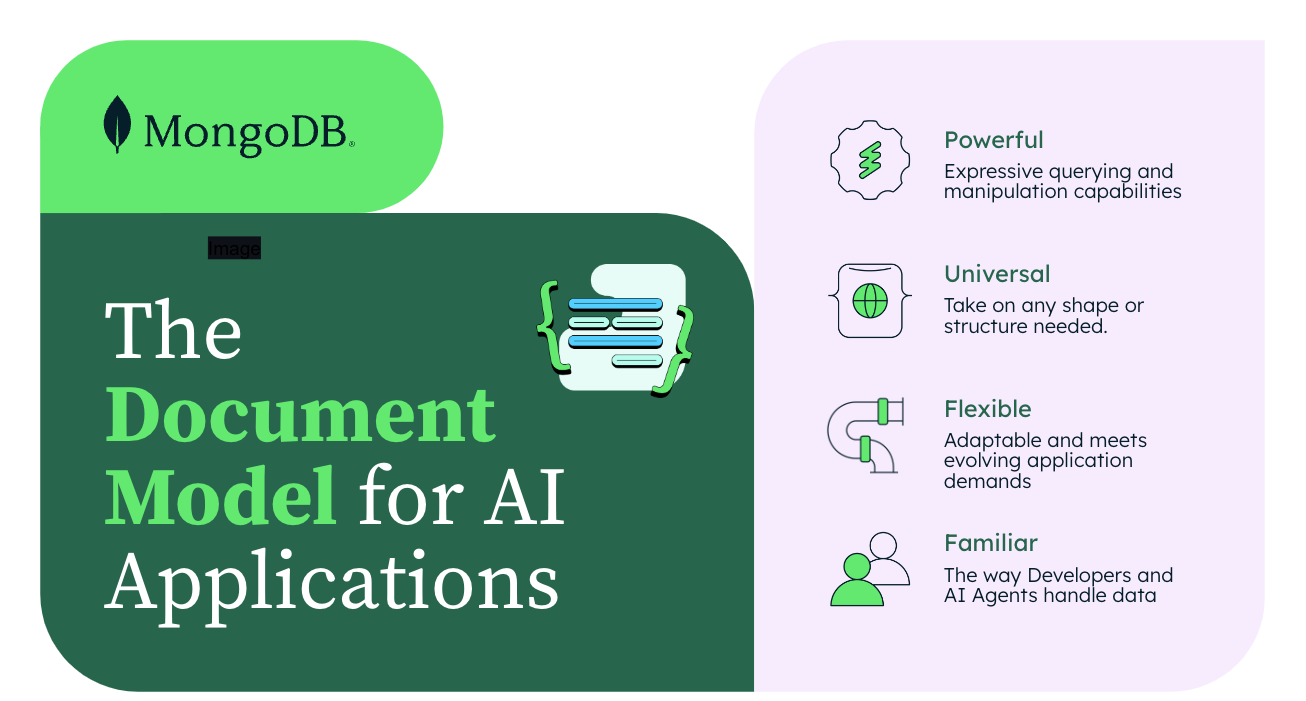

In [ ]:
documents = dataset_df.to_dict('records')
collection.insert_many(documents)

print("Data ingestion into MongoDB completed")

NameError: name 'dataset_df' is not defined

## Step 6: MongoDB Query language and Vector Search

**Query flexibility**

MongoDB's query language is designed to work well with document structures, making it easy to query and manipulate ingested data using familiar Python-like syntax.


**Aggregation Pipeline**

MongoDB's aggregation pipelines is a powerful feature of the MongoDB Database that allows for complex data processing and analysis within the database.
Aggregation pipeline can be thought of similarly to pipelines in data engineering or machine learning, where processes operate sequentially, each stage taking an input, performing operations, and providing an output for the next stage.

**Stages**

Stages are the building blocks of an aggregation pipeline.
Each stage represents a specific data transformation or analysis operation.
Common stages include:
  - `$match`: Filters documents (similar to WHERE in SQL)
  - `$group`: Groups documents by specified fields
  - `$sort`: Sorts the documents
  - `$project`: Reshapes documents (select, rename, compute fields)
  - `$limit`: Limits the number of documents
  - `$unwind`: Deconstructs array fields
  - `$lookup`: Performs left outer joins with other collections



In [ ]:
def vector_search(user_query, collection):
  """
  Perform a vector search in the MongoDB collection based on the user query.

  Args:
  user_query (str): The user's query string.
  collection (MongoCollection): The MongoDB collection to search.

  Returns:
  list: A list of matching documents.
  """

  # Generate embedding for the user query
  query_embedding = get_embedding(user_query)

  if query_embedding is None:
    return "Invalid query or embedding generation failed."

  # Define the vector search pipeline
  vector_search_stage = {
    "$vectorSearch": {
      "index": "vector_index",
      "queryVector": query_embedding,
      "path": "embedding",
      "numCandidates": 150,  # Number of candidate matches to consider
      "limit": 2  # Return top 4 matches
    }
  }

  unset_stage = {
    "$unset": "embedding"  # Exclude the 'embedding' field from the results
  }

  project_stage = {
    "$project": {
      "_id": 0,  # Exclude the _id field
      "company": 1,  # Include the plot field
      "reports": 1,  # Include the title field
      "combined_attributes": 1, # Include the genres field
      "score": {
        "$meta": "vectorSearchScore"  # Include the search score
      }
    }
  }

  pipeline = [vector_search_stage, unset_stage, project_stage]

  # Execute the search
  results = collection.aggregate(pipeline)
  return list(results)


## Step 7:  Add the Cohere Reranker
Cohere rerank functions as a second stage search that can improve the precision of your first stage search results

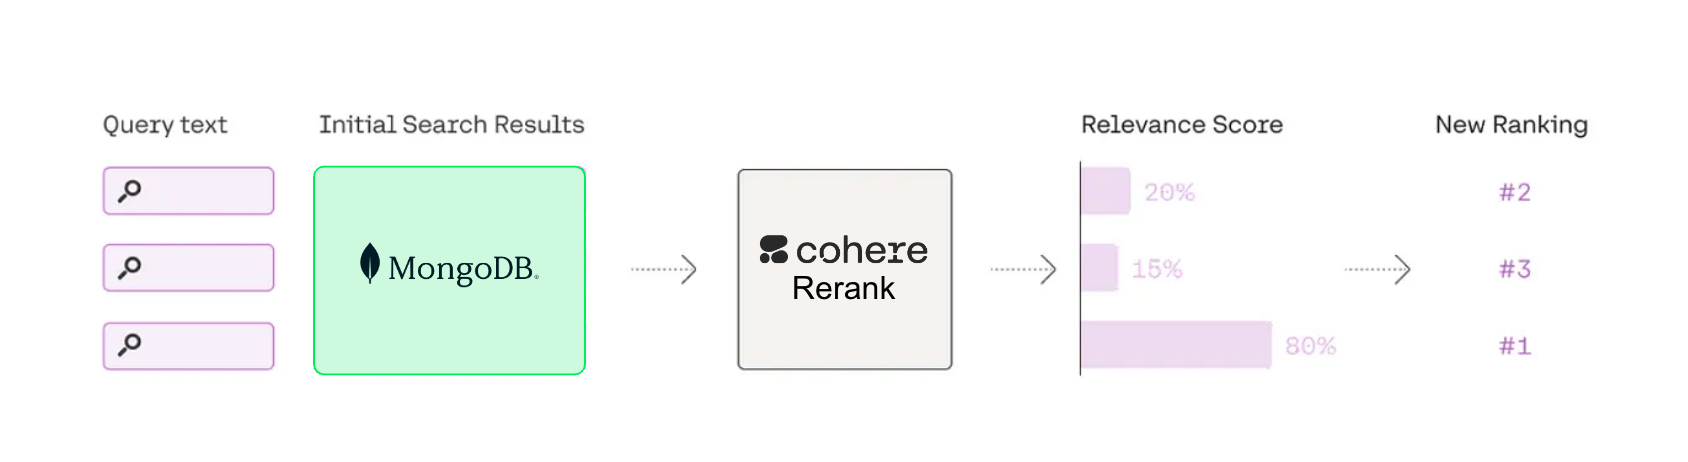

In [ ]:

def rerank_documents(query: str, documents, top_n: int = 3):
    # Prepare documents for reranking
    rerank_docs = [
        {
            'text': doc['company'],
            'reports': doc['reports'],
            'combined_attributes': doc['combined_attributes']
        }
        for doc in documents
        if doc['company'].strip()  # Filter out empty or whitespace-only plots
    ]

    if not rerank_docs:
        print("No valid documents to rerank.")
        return []

    # Perform reranking with Cohere ReRank Model
    try:
        response = co.rerank(
            query=query,
            documents=rerank_docs,
            top_n=top_n,
            model="rerank-english-v3.0",
        )

        # Extract the top reranked documents
        top_documents_after_rerank = []
        for result in response.results:
            original_doc = rerank_docs[result.index]
            top_documents_after_rerank.append({
                'company': original_doc['company'],
                'reports': original_doc['report'],
                'combined_attributes': original_doc['combined_attributes'],
                'relevance_score': result.relevance_score
            })

        # Print the results
        print(f"\nHere are the top {top_n} documents after rerank:")
        for doc in top_documents_after_rerank:
            print(f"== {doc['title']} (Relevance: {doc['relevance_score']:.4f})")

        return top_documents_after_rerank

    except Exception as e:
        print(f"An error occurred during reranking: {e}")
        return documents[:top_n]  # Return top N documents without reranking

In [ ]:
import pprint

def get_reranked_vector_search_result(query, collection):

  get_knowledge = vector_search(query, collection)

  print(f"\nDocuments returned after vector search and before reranking:")
  pprint.pprint(get_knowledge)

  reranked_documents = rerank_documents(query, get_knowledge)

  return reranked_documents

## Step 8: Handling User Queries

In [ ]:
# Conduct query with retrival of sources
query = "What companies have negative market reports?"
source_information = get_reranked_vector_search_result(query, collection)
combined_information = f"\nQuery: {query}\nContinue to answer the query by using the reranked vector Search Results:\n"
print(combined_information)
pprint.pprint(source_information)

In [ ]:
def format_documents_for_chat(documents):
  return [
    {
        "company": doc['company'],
        # "reports": doc['reports'],
        "combined_attributes": doc['combined_attributes']
    }
    for doc in documents
  ]

# Generating response with Cohere Command R
response = co.chat(
  message=query,
  documents=format_documents_for_chat(source_information),
  model="command-r-plus",
  temperature=0.3
)

print("Final answer:")
print(response.text)

Final answer:
I found two companies that have experienced some challenges amidst overall positive market reports:

## TechInnovate
TechInnovate (TCIV) has faced a slight decrease in its share price due to global market volatility and increased competition. The company also had a slight decrease in gross margins due to higher production costs and faced challenges related to geographic compliance. However, TechInnovate demonstrated strong performance in 2023 and 2024, showcasing dynamic growth and making it a notable player in the market. Its diverse product range and global expansion efforts have contributed to its success. The stock is recommended to buy with a price target of $140 per share within the next year.

## BioTech Innovations
BioTech Innovations (BTCI) faced challenges such as supply chain disruptions due to global economic uncertainties and the highly competitive nature of the biotechnology industry. However, the company has shown resilience and continued growth, strengthen

In [ ]:
for cite in response.citations:
  print(cite)

start=104 end=116 text='TechInnovate' document_ids=['doc_0']
start=130 end=136 text='(TCIV)' document_ids=['doc_0']
start=149 end=183 text='slight decrease in its share price' document_ids=['doc_0']
start=191 end=215 text='global market volatility' document_ids=['doc_0']
start=220 end=242 text='increased competition.' document_ids=['doc_0']
start=266 end=298 text='slight decrease in gross margins' document_ids=['doc_0']
start=306 end=329 text='higher production costs' document_ids=['doc_0']
start=340 end=384 text='challenges related to geographic compliance.' document_ids=['doc_0']
start=420 end=455 text='strong performance in 2023 and 2024' document_ids=['doc_0']
start=468 end=482 text='dynamic growth' document_ids=['doc_0']
start=499 end=528 text='notable player in the market.' document_ids=['doc_0']
start=533 end=554 text='diverse product range' document_ids=['doc_0']
start=559 end=575 text='global expansion' document_ids=['doc_0']
start=621 end=648 text='stock is recommended to buy

## Step 9: Using MongoDB as a Data Store for Conversation History

In [ ]:
from typing import Dict, Optional, List

class CohereChat:

    def __init__(self, cohere_client, system: str = "", database: str = "cohere_chat",
                 main_collection: str = "main_collection", history_params: Optional[Dict[str, str]] = None):
        self.co = cohere_client
        self.system = system
        self.history_params = history_params or {}

        # Use the connection string from history_params
        self.client = pymongo.MongoClient(self.history_params.get('connection_string', 'mongodb://localhost:27017/'))

        # Use the database parameter
        self.db = self.client[database]

        # Use the main_collection parameter
        self.main_collection = self.db[main_collection]

        # Use the history_collection from history_params, or default to "chat_history"
        self.history_collection = self.db[self.history_params.get('history_collection', 'chat_history')]

        # Use the session_id from history_params, or default to "default_session"
        self.session_id = self.history_params.get('session_id', 'default_session')

    def add_to_history(self, message: str, prefix: str = ""):
        self.history_collection.insert_one({
            'session_id': self.session_id,
            'message': message,
            'prefix': prefix
        })

    def get_full_prompt(self) -> str:
        history = self.history_collection.find({'session_id': self.session_id}).sort('_id', 1)
        prompt = self.system + "\n" + "\n".join([f"{item['prefix']}: {item['message']}" for item in history])
        return prompt

    def rerank_documents(self, query: str, documents: List[Dict], top_n: int = 3) -> List[Dict]:
        rerank_docs = [
            {
              'company': doc['company'],
              'combined_attributes': doc['combined_attributes']
            }
            for doc in documents
            if doc['combined_attributes'].strip()
        ]

        if not rerank_docs:
            print("No valid documents to rerank.")
            return []

        try:
            response = self.co.rerank(
                query=query,
                documents=rerank_docs,
                top_n=top_n,
                model="rerank-english-v3.0",
            )

            top_documents_after_rerank = [
                {
                    'company': rerank_docs[result.index]['company'],
                    'combined_attributes': rerank_docs[result.index]['combined_attributes'],
                    'relevance_score': result.relevance_score
                }
                for result in response.results
            ]

            print(f"\nHere are the top {top_n} documents after rerank:")
            for doc in top_documents_after_rerank:
                print(f"== {doc['title']} (Relevance: {doc['relevance_score']:.4f})")

            return top_documents_after_rerank

        except Exception as e:
            print(f"An error occurred during reranking: {e}")
            return documents[:top_n]

    def format_documents_for_chat(self, documents: List[Dict]) -> List[Dict]:
        return [
            {
                "company": doc['company'],
                "combined_attributes": doc['combined_attributes']
            }
            for doc in documents
        ]

    def send_message(self, message: str, vector_search_func) -> str:
        self.add_to_history(message, "USER")

        # Perform vector search
        search_results = vector_search_func(message, self.main_collection)

        # Rerank the search results
        reranked_documents = self.rerank_documents(message, search_results)

        # Format documents for chat
        formatted_documents = self.format_documents_for_chat(reranked_documents)

        # Generate response using Cohere chat
        response = self.co.chat(
            # chat_history=
            message=message,
            documents=formatted_documents,
            model="command-r",
            temperature=0.3
        )

        result = response.text
        self.add_to_history(result, "CHATBOT")

        print("Final answer:")
        print(result)

        print("\nCitations:")
        for cite in response.citations:
            print(cite)

        return result

    def show_history(self):
        history = self.history_collection.find({'session_id': self.session_id}).sort('_id', 1)
        for item in history:
            print(f"{item['prefix']}: {item['message']}")

In [ ]:
# Initialize CohereChat
chat = CohereChat(
    co,
    system="You are a helpful assistant.",
    database=DB_NAME,
    main_collection=COLLECTION_NAME,
    history_params={
        'connection_string': MONGO_URI,
        'history_collection': "chat_history",
        'session_id': 0
    }
)

# Send a message
response = chat.send_message("What is the best investment to make why?", vector_search)

An error occurred during reranking: status_code: 400, body: {'message': 'invalid request: list of documents must not contain only empty strings or only whitespace'}
Final answer:
Based on the information provided, here are two of the most promising investment opportunities along with their key highlights:

## TechInnovate (TCIV):
- Impressive year-over-year revenue growth in 2023: 20%
- Net profits rose by 15% compared to the previous year
- Launch of two new products, including a portable medical imaging device and a cloud-based medical records management solution
- Strong international expansion, with a 30% increase in international sales
- Stock recommendation: buying the stock is recommended with a price target of $120 per share by the end of 2024. 

## AI Dynamics (AIDYN):
- Revenue growth exceeding the industry average in 2023
- Net income increase resulting in a robust bottom line
- Launch of the AI-powered data analytics platform, 'Quantum', and 'AI-Assist', an AI-based virtual

In [ ]:
# Show chat history
chat.show_history()

user: What is the best investment to make why?
user: What is the best investment to make why?
user: What is the best investment to make why?
model: Based on the information provided, here are two of the most promising investment opportunities along with their key highlights:

## TechInnovate (TCIV):
- Impressive year-over-year revenue growth in 2023: 20%
- Net profits rose by 15% compared to the previous year
- Launch of two new products, including a portable medical imaging device and a cloud-based medical records management solution
- Strong international expansion, with a 30% increase in international sales
- Stock recommendation: buying the stock is recommended with a price target of $120 per share by the end of 2024. 

## AI Dynamics (AIDYN):
- Revenue growth exceeding the industry average in 2023
- Net income increase resulting in a robust bottom line
- Launch of the AI-powered data analytics platform, 'Quantum', and 'AI-Assist', an AI-based virtual assistant
- Strengthened marke